In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
### Let's look at all of the different options/subtopics in geopandas

print(dir(gpd))

['GeoDataFrame', 'GeoSeries', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_compat', '_config', '_decorator', '_version', 'array', 'base', 'clip', 'datasets', 'explore', 'geodataframe', 'geopandas', 'geoseries', 'gpd', 'io', 'list_layers', 'np', 'options', 'overlay', 'pd', 'plotting', 'points_from_xy', 'read_feather', 'read_file', 'read_parquet', 'read_postgis', 'show_versions', 'sindex', 'sjoin', 'sjoin_nearest', 'tools']


In [2]:
block = gpd.read_file("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/Median Income by Block group/acs2023_5yr_B19013_15000US060770040031.shp")
block.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
block = block.to_crs(3310)
block

,geoid,name,B19013001,B19013001e,geometry
0,15000US060770001011,"BG 1, Tract 1.01, San Joaquin, CA",32254.0,11555.0,"POLYGON ((-112668.574 -6475.165, -112440.196 -..."
1,15000US060770001012,"BG 2, Tract 1.01, San Joaquin, CA",43831.0,23380.0,"POLYGON ((-113126.454 -6567.01, -112900.281 -6..."
2,15000US060770001021,"BG 1, Tract 1.02, San Joaquin, CA",16625.0,1682.0,"POLYGON ((-113667.614 -5597.172, -113564.659 -..."
3,15000US060770001022,"BG 2, Tract 1.02, San Joaquin, CA",36859.0,7566.0,"POLYGON ((-112876.642 -5438.62, -112762.251 -5..."
4,15000US060770001023,"BG 3, Tract 1.02, San Joaquin, CA",9904.0,9405.0,"POLYGON ((-112787.786 -5881.643, -112673.127 -..."
...,...,...,...,...,...
229,15000US060770041081,"BG 1, Tract 41.08, San Joaquin, CA",98750.0,39263.0,"POLYGON ((-112065.821 3071.997, -112058.908 31..."
230,15000US060770041082,"BG 2, Tract 41.08, San Joaquin, CA",126688.0,33834.0,"POLYGON ((-111292.159 3690.188, -110973.319 36..."
231,15000US060770041083,"BG 3, Tract 41.08, San Joaquin, CA",100740.0,37894.0,"POLYGON ((-116141.428 5398.873, -116030.676 53..."
232,15000US060770041084,"BG 4, Tract 41.08, San Joaquin, CA",142364.0,27674.0,"POLYGON ((-111959.564 4581.451, -111956.326 46..."


In [4]:
SJC = gpd.read_file("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/CityLimits/CityLimits.shp")

In [5]:
SJC.crs
SJC = SJC.to_crs(3310)

In [6]:
SJC = SJC[SJC['NAME'] == 'STOCKTON']
SJC

,NAME,LONGNAME,SHORTNAME,FIPSCODE,CREATED_US,CREATED_DA,LAST_EDITE,LAST_EDI_1,POPEST,SHAPE_AREA,SHAPE_LEN,geometry
3,STOCKTON,City of Stockton,STO,0675000,None,NaT,BWADDLE,2025-02-11,318522,1.856425e+09,734209.366966,"POLYGON ((-121114.43 5500.004, -120964.37 5497..."


In [7]:
block_clip = block.clip(SJC)

block_clip

,geoid,name,B19013001,B19013001e,geometry
204,15000US060770038032,"BG 2, Tract 38.03, San Joaquin, CA",97212.0,52415.0,"MULTIPOLYGON (((-116411.576 -12092.37, -115988..."
216,15000US060770038082,"BG 2, Tract 38.08, San Joaquin, CA",NaN,NaN,"POLYGON ((-114438.447 -12238.907, -114419.525 ..."
211,15000US060770038061,"BG 1, Tract 38.06, San Joaquin, CA",102083.0,50858.0,"POLYGON ((-115461.369 -11886.248, -115453.74 -..."
217,15000US060770038083,"BG 3, Tract 38.08, San Joaquin, CA",117866.0,33921.0,"POLYGON ((-114259.832 -11491.468, -114165.353 ..."
212,15000US060770038062,"BG 2, Tract 38.06, San Joaquin, CA",95347.0,53158.0,"POLYGON ((-115206.308 -11401.711, -115185.314 ..."
...,...,...,...,...,...
225,15000US060770040042,"BG 2, Tract 40.04, San Joaquin, CA",178683.0,146062.0,"MULTIPOLYGON (((-121685.194 4763.364, -121681...."
222,15000US060770040032,"BG 2, Tract 40.03, San Joaquin, CA",134940.0,21956.0,"POLYGON ((-120056.639 4681.616, -120055.69 467..."
149,15000US060770032192,"BG 2, Tract 32.19, San Joaquin, CA",112500.0,102893.0,"POLYGON ((-118308.215 5134.833, -118262.83 513..."
228,15000US060770041061,"BG 1, Tract 41.06, San Joaquin, CA",92143.0,25741.0,"MULTIPOLYGON (((-114834.15 5403.043, -114837.8..."


In [9]:
df = pd.read_csv("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/Data/socioeconomic/Household type/ACSDT5Y2023.B11001-Data.csv")
df2 = pd.read_csv("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/Data/socioeconomic/Education of voting age citizens/ACSDT5Y2023.B29002-Data.csv")
print(df.columns)
print(df2.columns)

Index(['GEO_ID', 'geoid', 'Geographic Area Name', 'Block', 'Census', 'Total',
       'Family households', 'Family households:Married-couple family',
       'Family households:Other family', 'Nonfamily households',
       'Nonfamily households:Householder living alone',
       'Nonfamily households:Householder not living alone'],
      dtype='object')
Index(['GEO_ID', 'geoid', 'NAME', 'Total', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'no_highschool', 'highschool',
       'some_college', 'post_secondary', 'associate', 'bachelor', 'graduate'],
      dtype='object')


In [10]:
gdf1 = block_clip.copy()
gdf2 = block_clip.copy()
merge1 = gdf1.merge(df, on="geoid", how="inner")
merge2 = gdf2.merge(df2, on="geoid", how="inner")

merge1.columns

Index(['geoid', 'name', 'B19013001', 'B19013001e', 'geometry', 'GEO_ID',
       'Geographic Area Name', 'Block', 'Census', 'Total', 'Family households',
       'Family households:Married-couple family',
       'Family households:Other family', 'Nonfamily households',
       'Nonfamily households:Householder living alone',
       'Nonfamily households:Householder not living alone'],
      dtype='object')

In [11]:
merge2.columns

Index(['geoid', 'name', 'B19013001', 'B19013001e', 'geometry', 'GEO_ID',
       'NAME', 'Total', 'Less than 9th grade', '9th to 12th grade, no diploma',
       'no_highschool', 'highschool', 'some_college', 'post_secondary',
       'associate', 'bachelor', 'graduate'],
      dtype='object')

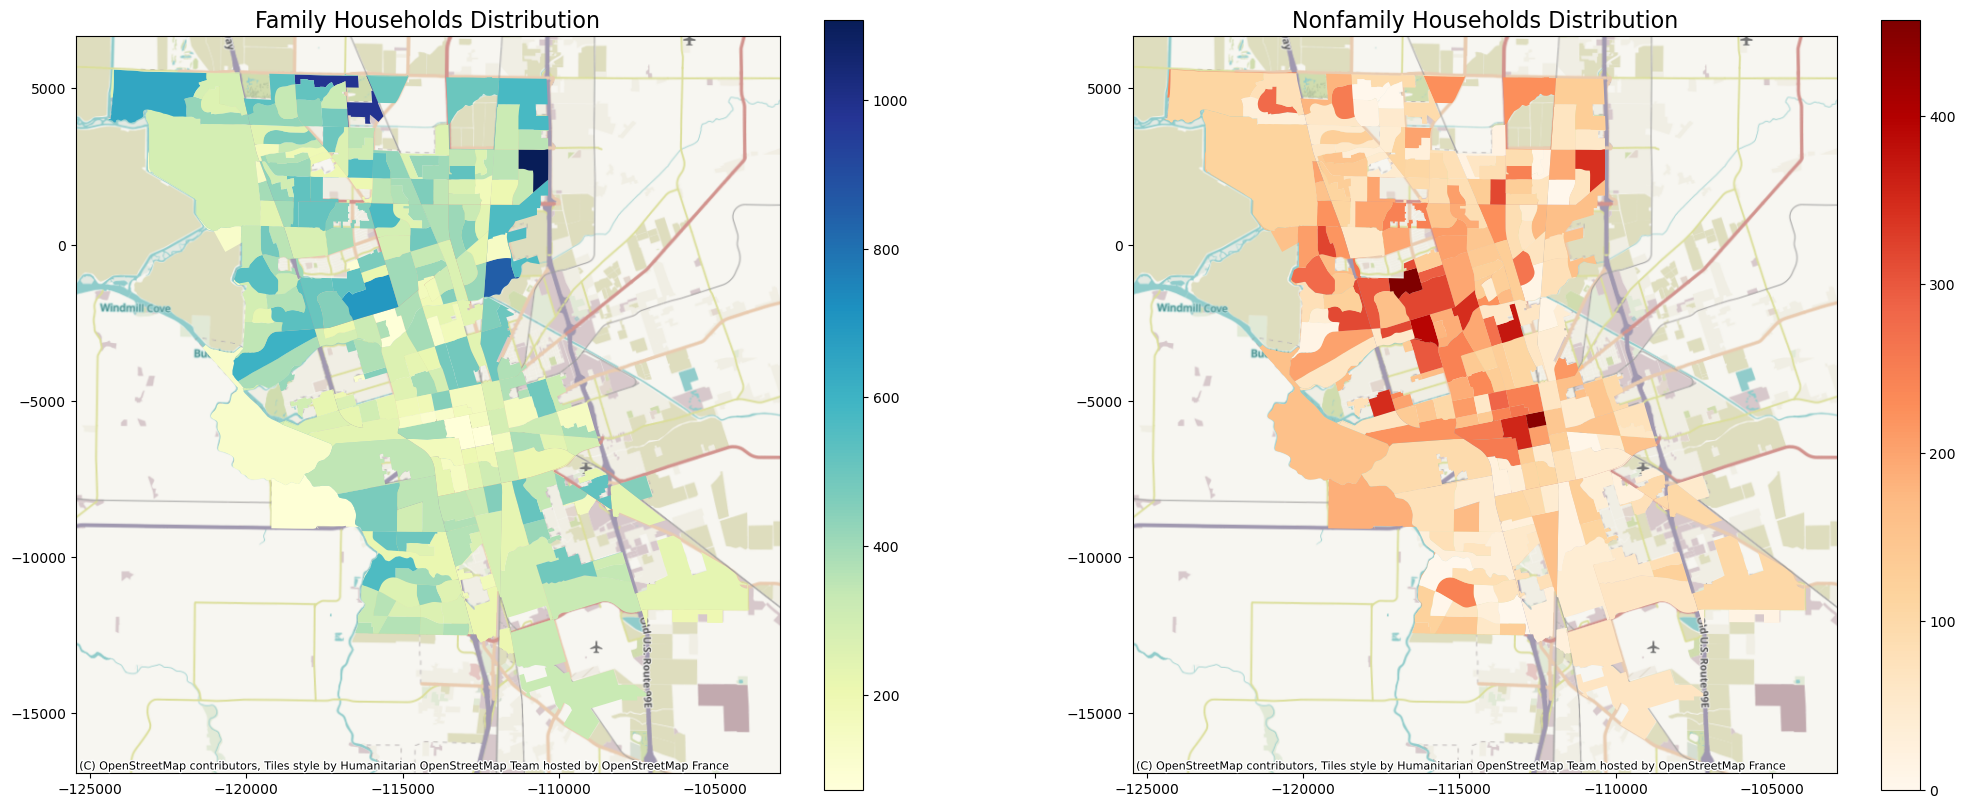

In [12]:
#Household 
import geodatasets
import contextily as cx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(1,2, figsize=(25, 10)) 
merge1.plot(column = 'Family households', cmap='YlGnBu', legend = True, ax = ax[0])
cx.add_basemap(ax = ax[0], crs=merge1.crs)

merge1.plot(column = 'Nonfamily households', cmap='OrRd', legend = True, ax = ax[1])
cx.add_basemap(ax = ax[1], crs=merge1.crs)

ax[0].set_title("Family Households Distribution", fontsize=16)
ax[1].set_title("Nonfamily Households Distribution", fontsize=16)
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/household.png', dpi=300, bbox_inches='tight')

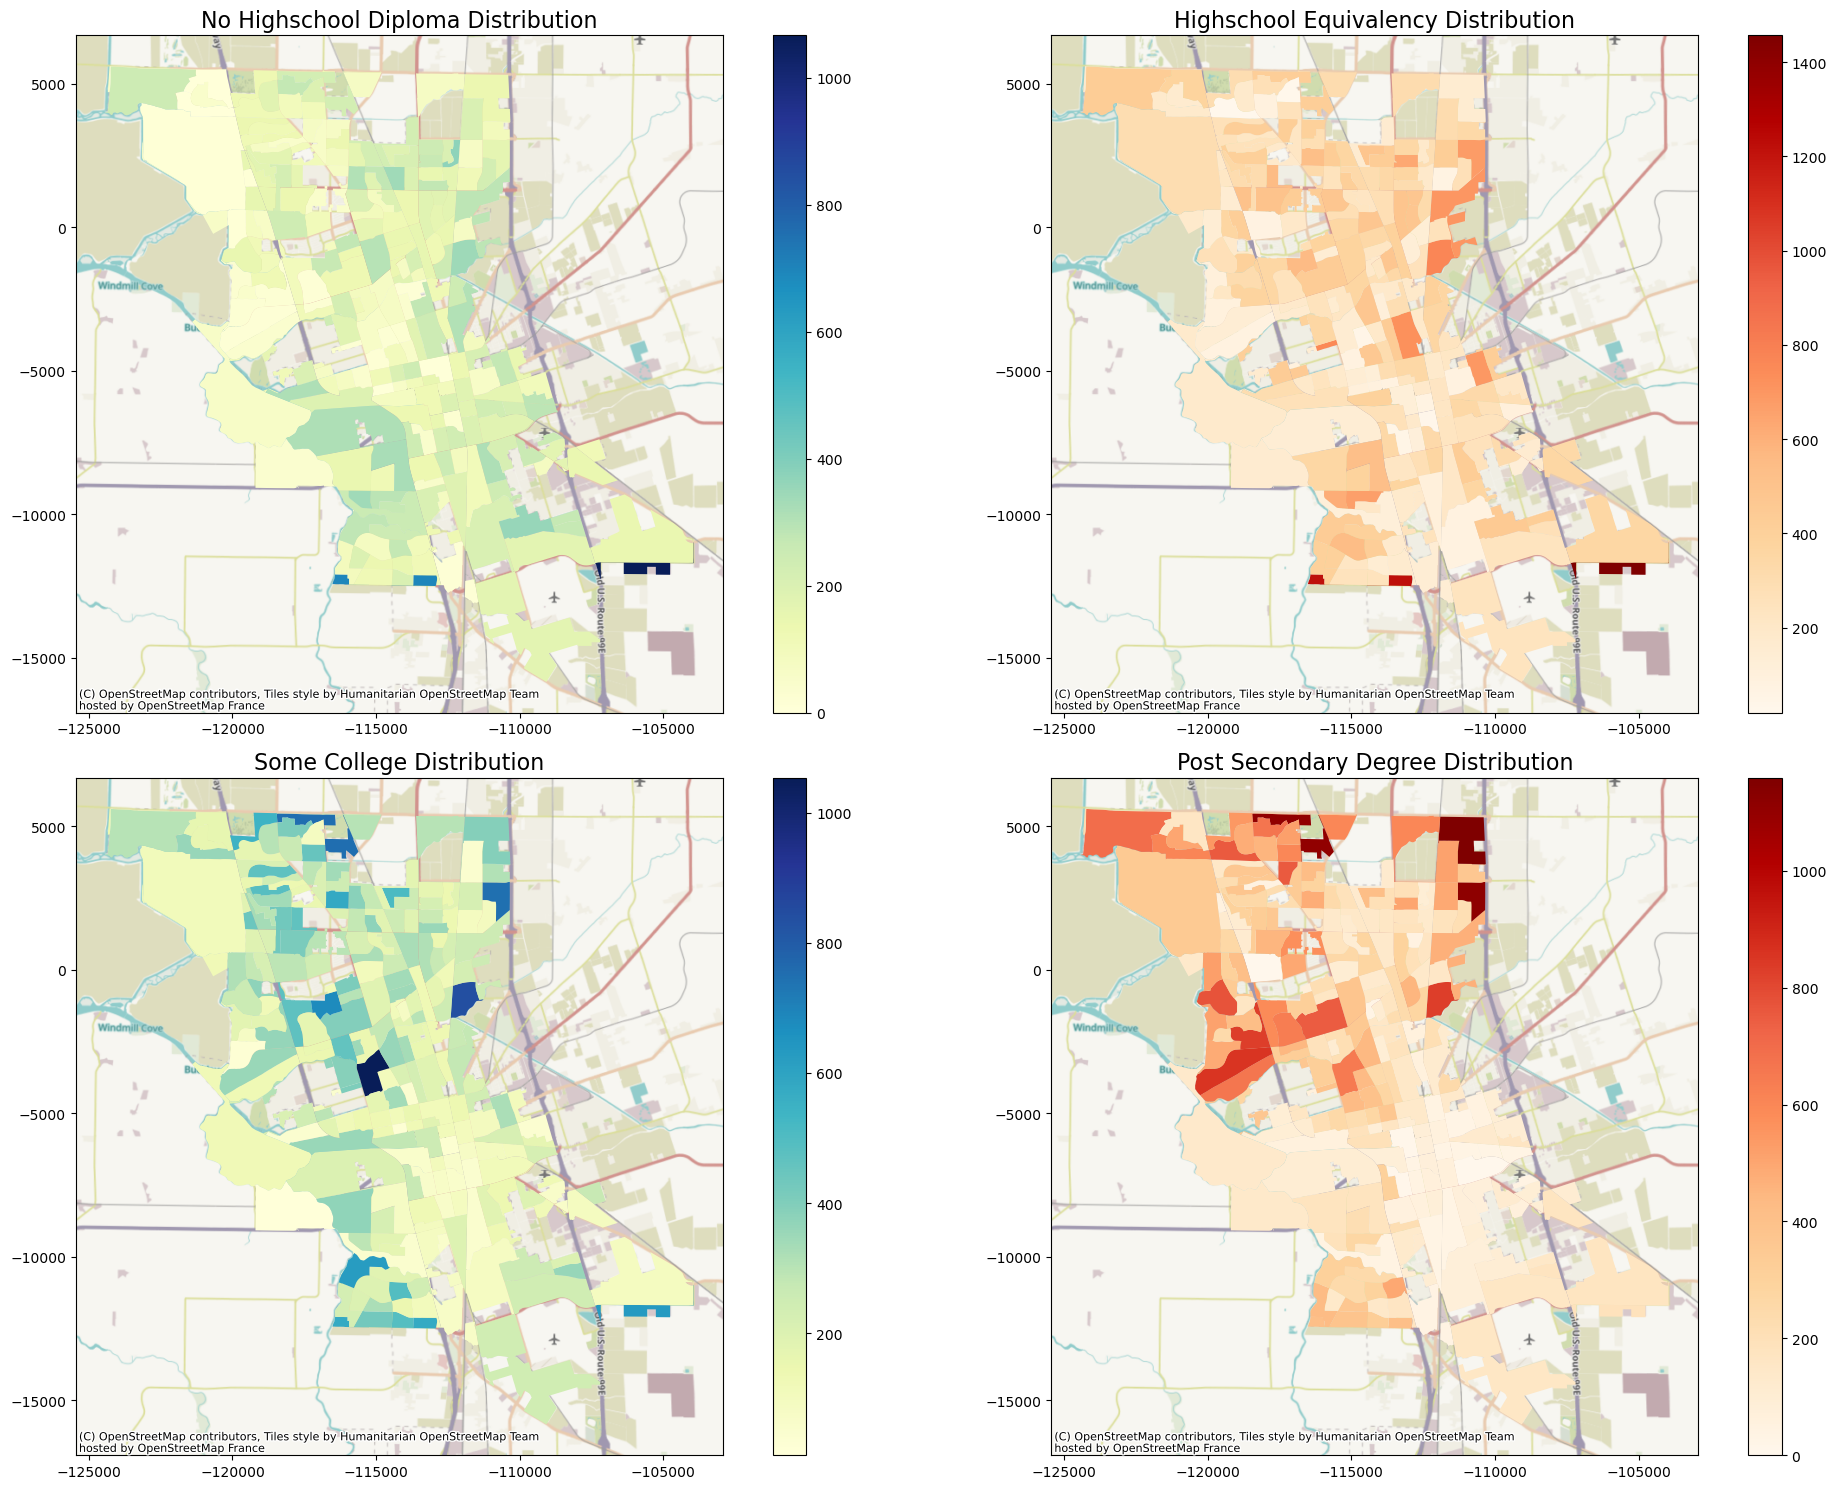

In [68]:
#Education

fig, ax = plt.subplots(2,2, figsize=(20, 15)) 
merge2.plot(column = 'no_highschool', cmap='YlGnBu', legend = True, ax = ax[0, 0])
cx.add_basemap(ax = ax[0,0], crs=merge2.crs)

merge2.plot(column = 'highschool', cmap='OrRd', legend = True, ax = ax[0, 1])
cx.add_basemap(ax = ax[0,1], crs=merge2.crs)

merge2.plot(column = 'some_college', cmap='YlGnBu', legend = True, ax = ax[1, 0])
cx.add_basemap(ax = ax[1,0], crs=merge2.crs)

merge2.plot(column = 'post_secondary', cmap='OrRd', legend = True, ax = ax[1, 1])
cx.add_basemap(ax = ax[1,1], crs=merge2.crs)

ax[0,0].set_title("No Highschool Diploma Distribution", fontsize=16)
ax[0,1].set_title("Highschool Equivalency Distribution", fontsize=16)
ax[1,0].set_title("Some College Distribution", fontsize=16)
ax[1,1].set_title("Post Secondary Degree Distribution", fontsize=16)

plt.tight_layout()
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/education.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Median Income Distribution')

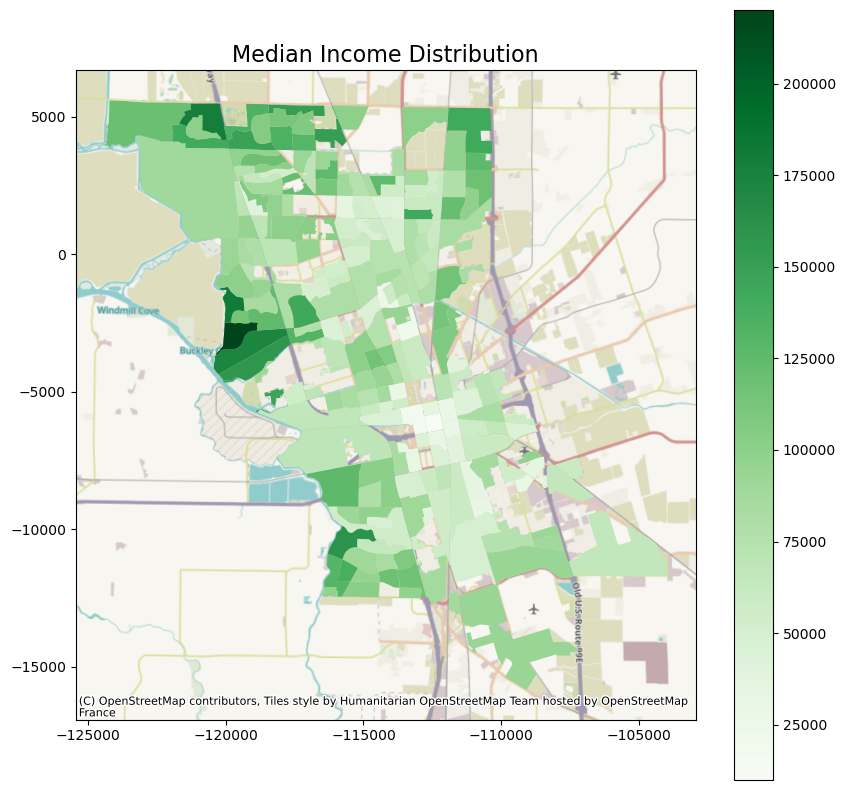

In [66]:
ax.set_title("Median Income Distribution", fontsize=16)
#Income

fig, ax = plt.subplots(figsize=(10, 10)) 
block_clip.plot(column = 'B19013001', legend = True , ax=ax, cmap='Greens')
cx.add_basemap(ax = ax, crs=block_clip.crs)

In [13]:
df3 = pd.read_csv("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/Data/output_19to23.csv")
df3_gdf = gpd.GeoDataFrame(df3, geometry=gpd.points_from_xy(df3["X"], df3["Y"]), crs="EPSG:4326")
df3_gdf = df3_gdf.to_crs(3310)

In [9]:
df3_gdf

,CALL_NO,REPORT_NO,CALL_TYPE_ORIG,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,PRIORITY,BEAT,CURR_DGROUP,REP_DIST,FIRST_Cross_Street,X,Y,CALL_ENTRY_TIME_FORMATTED,DISTRICTNAME,CALL_ENTRY_DATE_F,category,geometry
0,P190430698,NaN,945,945,AMBULANCE REQ,1.0,VN,VAL,346,HAMMER & KATHLEEN,-121.296873,38.020917,1900-01-01 14:48:36,Valley Oak,2019-02-12,Medical & Fire Aid,POINT (-113697.955 1283.416)
1,P190430699,PD190005995,962,950,OBTAIN REPORT,3.0,CS,CIV,109,EL DORADO & MARKET,-121.289518,37.951718,1900-01-01 14:50:06,Civic,2019-02-12,Public Service / Administrative,POINT (-113157.804 -6417.293)
2,P190430699,PD190005995,962,950,OBTAIN REPORT,3.0,CS,CIV,109,EL DORADO & MARKET,-121.289518,37.951718,1900-01-01 14:50:06,Civic,2019-02-12,Public Service / Administrative,POINT (-113157.804 -6417.293)
3,P190430701,NaN,925R,925R,REPORTS,2.0,CS,CIV,109,EL DORADO & MARKET,-121.289518,37.951718,1900-01-01 14:50:45,Civic,2019-02-12,Public Service / Administrative,POINT (-113157.804 -6417.293)
4,P190430704,NaN,WELCK,WELCK,WELFARE CHECK,2.0,SE,SEA,106,LAFAYETTE & SAN JOAQUIN,-121.286390,37.950209,1900-01-01 14:52:25,Seaport,2019-02-12,Welfare & Mental Health,POINT (-112885.535 -6588.741)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556914,P190430696,NaN,415,415,DISTURBANCE,1.0,BE,BEA,307,CHAPARRAL & CODY,-121.339972,38.042255,1900-01-01 14:47:13,Bear Creek,2019-02-12,Disturbances,POINT (-117442.67 3707.778)
2556915,P190430695,NaN,10851R,10851R,STOLEN RECOVERY,3.0,LE,LAK,332,WOODSTOCK & YOKUTS,-121.303573,37.999321,1900-01-01 14:46:02,Lakeview,2019-02-12,Vehicle-Related,POINT (-114318.334 -1109.078)
2556916,P190430695,NaN,10851R,10851R,STOLEN RECOVERY,3.0,LE,LAK,332,WOODSTOCK & YOKUTS,-121.303573,37.999321,1900-01-01 14:46:02,Lakeview,2019-02-12,Vehicle-Related,POINT (-114318.334 -1109.078)
2556917,P190430699,PD190005995,962,950,OBTAIN REPORT,3.0,CS,CIV,109,EL DORADO & MARKET,-121.289518,37.951718,1900-01-01 14:50:06,Civic,2019-02-12,Public Service / Administrative,POINT (-113157.804 -6417.293)


In [32]:
police = gpd.read_file("/mnt/c/Users/huyti/OneDrive/Documents/anaconda_projects/CIVL293/Stockton/Police Districts_20251025/geo_export_8f391e4a-fb29-4742-adc6-522c0282bf50.shp")
police = police.to_crs(3310)

In [33]:
police.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

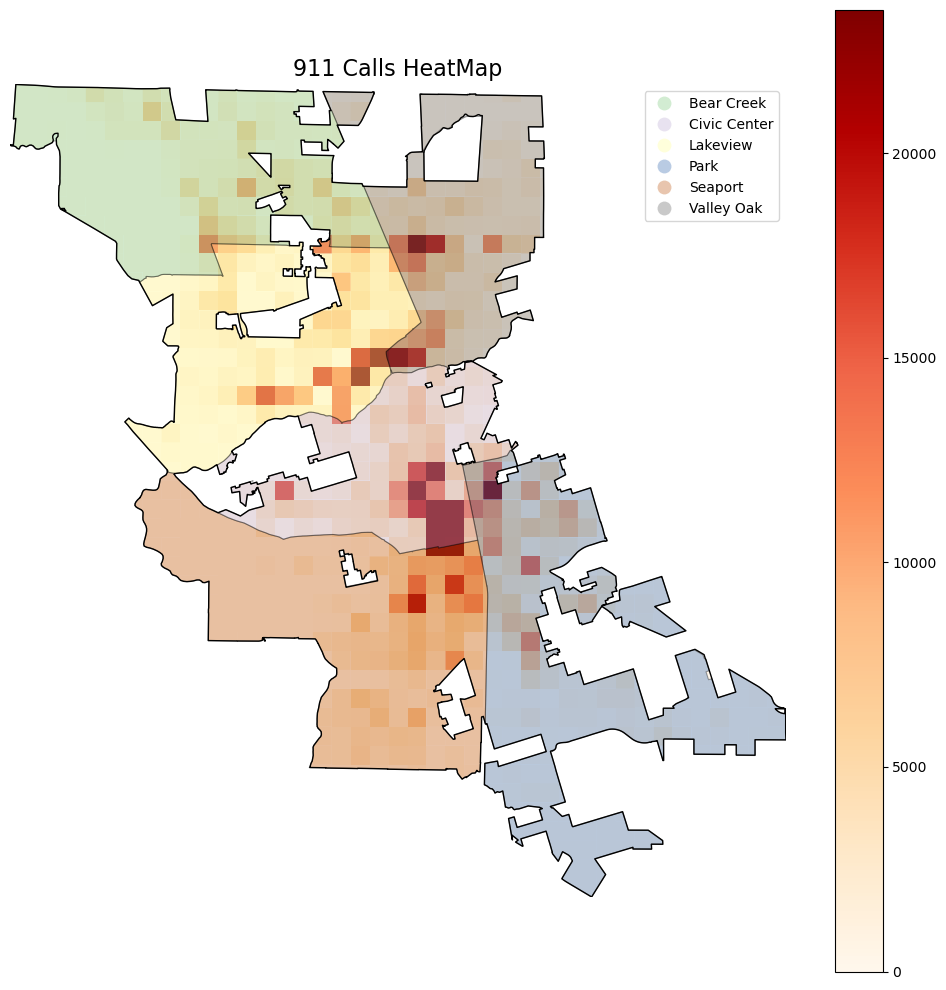

In [43]:
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# 1. Clip calls to Stockton
calls_in_stockton = gpd.clip(df3_gdf, SJC)

# 2. Build fishnet over Stockton
xmin, ymin, xmax, ymax = SJC.total_bounds
cell_size = 500  # meters

cols = np.arange(xmin, xmax, cell_size)
rows = np.arange(ymin, ymax, cell_size)

polygons = []
for x in cols:
    for y in rows:
        polygons.append(box(x, y, x + cell_size, y + cell_size))

grid = gpd.GeoDataFrame({"geometry": polygons}, crs=SJC.crs)
grid = gpd.overlay(grid, SJC, how="intersection")

# 3. Spatial join: count calls in each cell
join = gpd.sjoin(calls_in_stockton, grid, predicate="within")
counts = join.groupby("index_right").size()
grid["call_count"] = grid.index.map(counts).fillna(0)

# 4. Percentile clipping for color range (Option A)
vals = grid["call_count"].values
vmin = 0
vmax = np.percentile(vals, 99)   # clip top 1% of cells

# 5. Plot choropleth with clipped color scale
fig, ax = plt.subplots(figsize=(10, 10))

grid.plot(
    column="call_count",
    cmap="OrRd",
    linewidth=0,
    legend=True,
    vmin=vmin,          # apply clipping
    vmax=vmax,
    ax=ax
)

SJC.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# Police districts as semi‑transparent polygons
police.plot(
    ax=ax,
    column="districtla", legend=True, alpha=0.35,      # keep interior transparent
    cmap="Accent",
    edgecolor="black",
    linewidth=0.8,
)

# Zoom to Stockton bounds
xmin, ymin, xmax, ymax = SJC.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title("911 Calls HeatMap", fontsize=16)

ax.set_axis_off()
plt.tight_layout()
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/heatmap.png', dpi=300, bbox_inches='tight')

In [50]:
#Count categories within each district and sort descending
counts = (
    df3_gdf
    .groupby("DISTRICTNAME")["category"]   # per district
    .value_counts()                               # counts per category
    .groupby(level=0, group_keys=False)          # within each district
    .apply(lambda s: s.sort_values(ascending=False))
)

# 2. Convert to ordered category lists per district (no numbers)
ordered_cats = (
    counts
    .groupby(level=0)
    .apply(lambda s: list(s.index.get_level_values(1)))   # list of categories
    .reset_index(name="categories_ordered")
)
pd.set_option("display.max_colwidth", None)   # show full cell content
pd.set_option("display.max_rows", None)       # show all districts

print(ordered_cats.to_string(index=False))

DISTRICTNAME                                                                                                                                                                                                                                                                                   categories_ordered
  Bear Creek [Disturbances, Vehicle-Related, Medical & Fire Aid, Administrative / Other, Public Service / Administrative, Welfare & Mental Health, Violent Crime, Property Crime, Suspicious Activity, Special Operations / Hazard, Alarm-Related, Weapons, Animal-Related, Sexual Offenses, Drug / Vice Related]
       Civic [Public Service / Administrative, Disturbances, Administrative / Other, Medical & Fire Aid, Vehicle-Related, Welfare & Mental Health, Violent Crime, Property Crime, Suspicious Activity, Alarm-Related, Special Operations / Hazard, Weapons, Animal-Related, Sexual Offenses, Drug / Vice Related]
    Lakeview [Disturbances, Administrative / Other, Vehicle-Related, Medical & Fir

In [55]:
# Convert in place (adjust column name if different)
df3_gdf["CALL_ENTRY_DATE_F"] = pd.to_datetime(
    df3_gdf["CALL_ENTRY_DATE_F"],
    errors="coerce"          # invalid parses → NaT
)

df3_gdf["CALL_ENTRY_TIME_FORMATTED"] = pd.to_datetime(
    df3_gdf["CALL_ENTRY_TIME_FORMATTED"],
    errors="coerce"          # invalid parses → NaT
)

print(df3_gdf["CALL_ENTRY_DATE_F"].dtype)
print(df3_gdf["CALL_ENTRY_TIME_FORMATTED"].dtype)

datetime64[ns]
datetime64[ns]


/tmp/ipykernel_152326/3112299261.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dow_counts = df3_gdf.groupby(["dow", "DISTRICTNAME"]).size().unstack(fill_value=0)


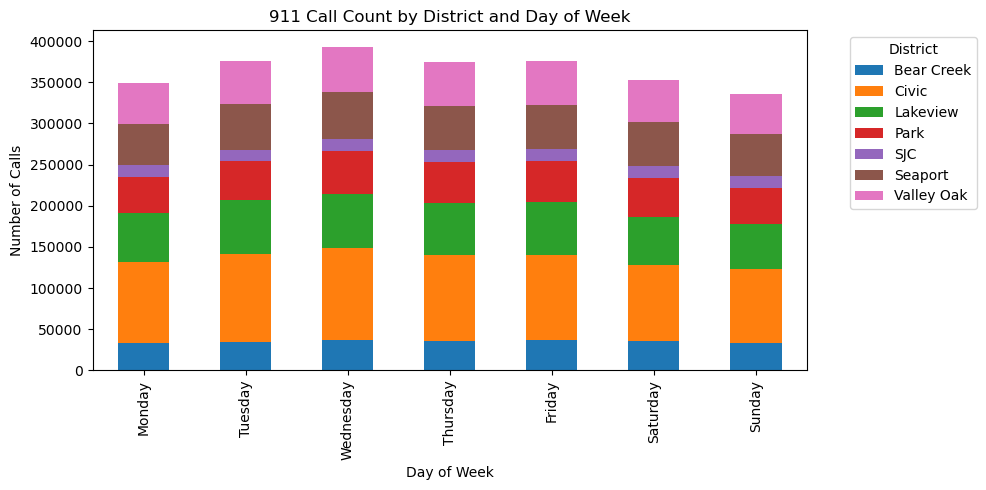

In [60]:
#Time series

# Add day-of-week name
df3_gdf["dow"] = df3_gdf["CALL_ENTRY_DATE_F"].dt.day_name()

# Order days Monday→Sunday
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df3_gdf["dow"] = pd.Categorical(df3_gdf["dow"], categories=dow_order, ordered=True)

# Group by day-of-week and district, count calls
dow_counts = df3_gdf.groupby(["dow", "DISTRICTNAME"]).size().unstack(fill_value=0)

# Plot stacked bar
fig, ax = plt.subplots(figsize=(10, 5))
dow_counts.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("911 Call Count by District and Day of Week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Calls")
ax.legend(title="District", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/day.png', dpi=300, bbox_inches='tight')

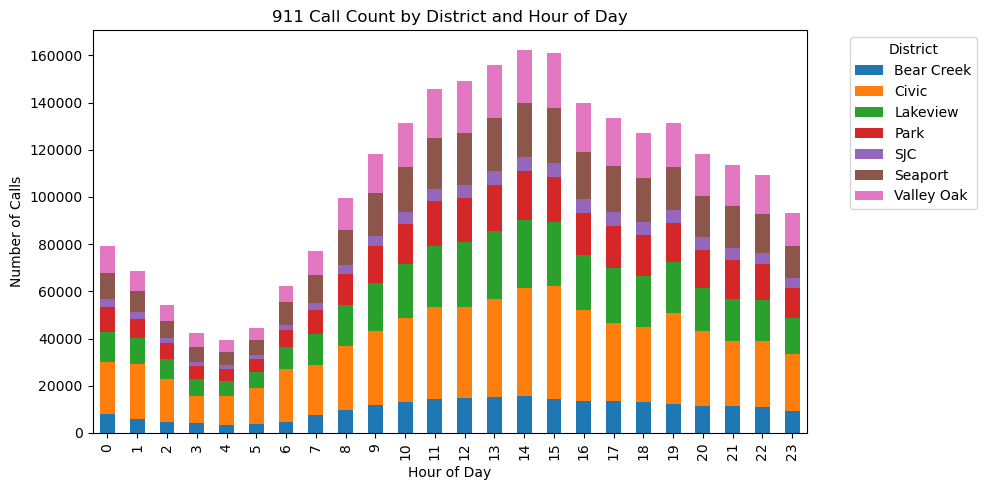

In [61]:
# Add hour of day (0–23)
df3_gdf["hour"] = df3_gdf["CALL_ENTRY_TIME_FORMATTED"].dt.hour

# Group by hour and district
hour_counts = df3_gdf.groupby(["hour", "DISTRICTNAME"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))
hour_counts.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("911 Call Count by District and Hour of Day")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Calls")
ax.legend(title="District", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()	
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/hour.png', dpi=300, bbox_inches='tight')

In [62]:
#Correlation charts

# Count calls in block groups of merge1 (household shapefile)
calls_hh = gpd.sjoin(
    df3_gdf,
    merge1[["geoid", "geometry"]],
    how="inner",
    predicate="within"
)

call_counts_hh = (
    calls_hh.groupby("geoid")
    .size()
    .rename("call_count")
    .reset_index()
)

merge1_calls = merge1.merge(call_counts_hh, on="geoid", how="left")
merge1_calls["call_count"] = merge1_calls["call_count"].fillna(0)

In [63]:
hh_vars = [
    "call_count",
    "Family households",
    "Nonfamily households"
]

hh_data = merge1_calls[hh_vars].dropna()
hh_corr = hh_data.corr(method="pearson")

print("Correlation with call_count (household type):")
print(hh_corr["call_count"])


Correlation with call_count (household type):
call_count              1.000000
Family households      -0.090613
Nonfamily households    0.271528
Name: call_count, dtype: float64


In [64]:
merge2_calls = merge2.merge(call_counts_hh, on="geoid", how="left")
merge2_calls["call_count"] = merge2_calls["call_count"].fillna(0)

edu_vars = [
    "call_count",
    "no_highschool",
    "highschool",
    "some_college",
    "post_secondary"
]
edu_data = merge2_calls[edu_vars].dropna()
edu_corr = edu_data.corr(method="pearson")

print("Correlation with call_count (education):")
print(edu_corr["call_count"])


Correlation with call_count (education):
call_count        1.000000
no_highschool     0.028238
highschool       -0.003982
some_college     -0.109528
post_secondary   -0.157901
Name: call_count, dtype: float64


In [65]:
income_calls = merge1.merge(call_counts_hh, on="geoid", how="left")
income_calls["call_count"] = income_calls["call_count"].fillna(0)

inc_data = income_calls[["call_count", "B19013001"]].dropna()
inc_corr = inc_data.corr(method="pearson")

print("Correlation with call_count (income):")
print(inc_corr["call_count"])


Correlation with call_count (income):
call_count    1.000000
B19013001    -0.321485
Name: call_count, dtype: float64


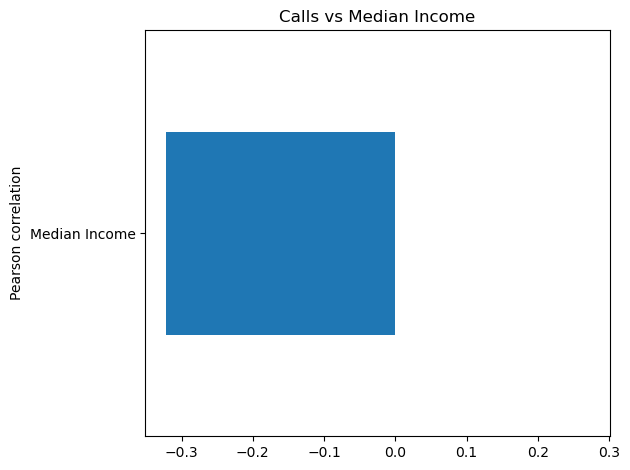

In [70]:
import matplotlib.pyplot as plt

# Household
hh_corr_with_calls = hh_corr["call_count"].drop("call_count")
hh_corr_with_calls.sort_values().plot(kind="barh", title="Calls vs Household Type")
plt.xlabel("Pearson correlation")
plt.tight_layout()
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/correlation1.png', dpi=300, bbox_inches='tight')

# Education
edu_corr_with_calls = edu_corr["call_count"].drop("call_count")
edu_corr_with_calls.sort_values().plot(kind="barh", title="Calls vs Education")
plt.xlabel("Pearson correlation")
plt.tight_layout()
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/correlation2.png', dpi=300, bbox_inches='tight')

# Income
inc_corr_renamed = inc_corr.rename(
    columns={"B19013001": "Median Income"},
    index={"B19013001": "Median Income"}
)

inc_corr_with_calls = inc_corr_renamed["call_count"].drop("call_count")

inc_corr_with_calls.plot(kind="barh", title="Calls vs Median Income")
plt.ylabel("Pearson correlation")
plt.tight_layout()
plt.savefig(r'/home/tinzzs/anaconda_projects/CIVL293/Final Project/correlation3.png', dpi=300, bbox_inches='tight')
